Import Packages

In [1]:
import numpy as np
import scipy.optimize as opt
import sympy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

### 5.1

The problem is: 
$$\max \limits_{W_2\in[0,W_1]}u(W_1-W_2)$$

### 5.2

The condition that characterizes the optimal amount of cake to leave for the next period $W_3$ in period 2 is:
$$\max \limits_{W_3\in[0,W_2]}u(W_2-W_3)$$
The condition that characterizes the optimal amount of cake to leave for the next period $W_2$ in period 1 is:
$$\max \limits_{W_2\in[0,W_1]}[u(W_1-W_2)+\max \limits_{W_3\in[0,W_2]}\beta u(W_2-W_3)]$$

### 5.3

The condition that characterizes the optimal amount of cake to leave for the next period ${W_2, W_3, W_4}$ in period 1, 2, 3 are respectively:
$$\max \limits_{W_2\in[0,W_1]}\{u(W_1-W_2)+\max \limits_{W_3\in[0,W_2]}\beta [u(W_2-W_3)+\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)]\}$$
$$\max \limits_{W_3\in[0,W_2]}\beta [u(W_2-W_3)+\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)]$$
$$\max \limits_{W_4\in[0,W_3]}\beta u(W_3-W_4)$$
From the 3rd condition, we know that $W_4=0$, from the 1st and 2nd condition, we know that if we differentiate the left hand side of 1st condition with respect to W_2 and W_3, every derivatives should equal to 0 to maximise it, i.e.,
$$-u'(W_1-W_2)+\beta u'(W_2-W_3)=0$$
$$-\beta u'(W_2-W_3)+\beta^2 u'(W_3-W_4)=0$$
We also know that $u(x)=ln(x)$,$W_1=1$ and $W_4=0$, so we can solve the equations to get $W_2=0.631$, $W_3=0.299$, we can then find out $c_1=W_1-W_2=0.369$, $c_2=W_2-W_3=0.332$, $c_3=W_3-W_4=0.299$
The evolve of $\{c_t\}_{t=1}^{3}$ and $\{W_t\}_{t=1}^{4}$ is as follows:

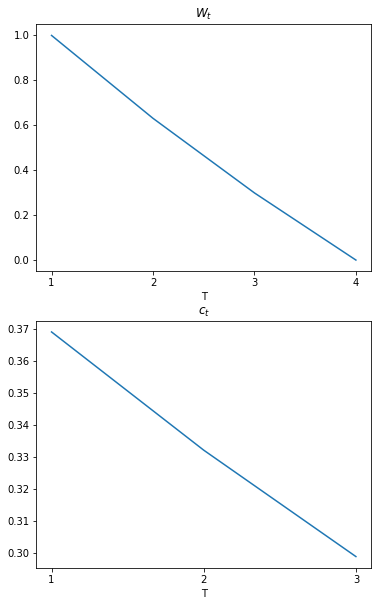

In [2]:
W = [1, 1-1/(1+0.9+0.81), 1-1.9/(1+0.9+0.81), 0]
c = [1/(1+0.9+0.81),0.9/(1+0.9+0.81),0.81/(1+0.9+0.81)]
T = [1,2,3,4]
fig, ax=plt.subplots(2,1,figsize=(6,10))
ax[0].plot(T, W)
ax[1].plot(T[:-1], c)
ax[0].set_title(r"$W_t$")
ax[0].set_xlabel('T')
ax[0].set_xticks([1,2,3,4])
ax[1].set_title(r"$c_t$")
ax[1].set_xlabel('T')
ax[1].set_xticks([1,2,3])

### 5.4

The condition that characterizes the optimal choice in period T-1 is:
$$-u'(W_{T-1}-\psi_{T-1}(W_{T-1}))+\beta u'(\psi_{T-1}(W_{T-1})) = 0$$
Then we can express $V_{T-1}$ as follows:
$$V_{T-1}(W_{T-1})=u(W_{T-1}-\psi_{T-1}(W_{T-1}))+\beta u(\psi_{T-1}(W_{T-1}))$$

### 5.5

According to the former question, we know $V_T(\bar{W})=u(\bar{W})$, suppose $V_{T-1}(\bar{W})=V_T(\bar{W})$, that is:
$$u(\bar{W})=u(\bar{W}-\psi_{T-1}(\bar{W}))+\beta u(\psi_{T-1}(\bar{W}))$$
$$-u'(\bar{W}-\psi_{T-1}(\bar{W}))+\beta u'(\psi_{T-1}(\bar{W})) = 0$$
Since $u(x)=ln(x)$ and we can solve former equations:
$$\psi_{T-1}(\bar{W})=\frac{\beta}{1+\beta}\bar{W}$$
$$\psi_{T}(\bar{W}) = \bar{W}$$
$$V_{T-1}(\bar{W})=ln(\frac{\bar{W}}{1+\beta})+\beta ln(\frac{\beta\bar{W}}{1+\beta})$$
$$V_T(\bar{W})=ln(\bar{W})$$

### 5.6

The finite horizon Bellman equation for the value function at time T-2 is:
$$V_{T-2}(W_{T-2})=\max \limits_{W_{T-1}} ln(W_{T-2}-W_{T-1}))+\beta ln(\frac{W_{T-1}}{1+\beta})+\beta^2 ln(\frac{\beta W_{T-1}}{1+\beta})$$
The condition that characterizes the optimal choice in period T-2 is:
$$-\frac{1}{(W_{T-2}-\psi_{T-2}(W_{T-2}))}+(\beta+\beta^2)\frac{1}{\psi_{T-2}(W_{T-2})} = 0$$
The analytical solution for $\psi_{T-2}(W_{T-2})$ and $V_{T-2}(W_{T-2})$ is:
$$\psi_{T-2}(W_{T-2})=\frac{\beta+\beta^{2}}{1+\beta+\beta^{2}}W_{T-2}$$
$$V_{T-2}(W_{T-2}) = ln(\frac{W_{T-2}}{1+\beta+\beta^{2}})+\beta ln(\frac{\beta W_{T-2}}{1+\beta+\beta^{2}})+\beta^2 ln(\frac{\beta^2 W_{T-2}}{1+\beta+\beta^{2}})$$

### 5.7

By induction, the analytical solution for $\psi_{T-s}(W_{T-s})$ and $V_{T-s}(W_{T-s})$ is:
$$\psi_{T-s}(W_{T-s})=\frac{\sum\limits_{i=1}^{s}\beta^{i}}{1+\sum\limits_{i=1}^{s}\beta^{i}}W_{T-s}$$
$$V_{T-s}(W_{T-s}) = \left[\sum\limits_{i=0}^{s-1} \beta^{i}ln\left(\frac{\beta^{i}W_{T-s}}{1+\sum\limits_{i=1}^{s}\beta^{i}}\right)\right]+\beta^{s}ln\left(\frac{\beta^{s} W_{T-s}}{1+\sum\limits_{i=1}^{s}\beta^{i}}\right)$$
Take limits of s tend to infinite, we have:
$$\psi(W_{T-s})=\beta W_{T-s}$$
$$V(W_{T-s}) = \left(\frac{1}{1-\beta}\right)ln((1-\beta)W_{T-s})+\frac{\beta}{(1-\beta)^2}ln(\beta)$$

### 5.8

$$V(W)=\max \limits_{w\in[0,W]} u(W-w))+\beta V(w)$$

### 5.9

The code is as follows:

In [3]:
W = np.linspace(0.01, 1, 100)

### 5.10

In [4]:
psi_T = np.empty(100)
Value_T = np.empty(100)
for i in range(100):
    w = W[i]
    value_func = lambda x: -np.log(w-x)
    psi_T[i] = max(float(opt.fmin(value_func, 0, disp = 0)),0)
    Value_T[i] = np.log(w-psi_T[i])
print("The policy function W' is", psi_T)
print(r"The value function V_T is", Value_T)

The policy function W' is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
The value function V_T is [-4.60517019 -3.91202301 -3.5065579  -3.21887582 -2.99573227 -2.81341072
 -2.65926004 -2.52572864 -2.40794561 -2.30258509 -2.20727491 -2.12026354
 -2.04022083 -1.96611286 -1.89711998 -1.83258146 -1.77195684 -1.71479843
 -1.66073121 -1.60943791 -1.56064775 -1.51412773 -1.46967597 -1.42711636
 -1.38629436 -1.34707365 -1.30933332 -1.27296568 -1.23787436 -1.2039728
 -1.17118298 -1.13943428 -1.10866262 -1.07880966 -1.04982212 -1.02165125
 -0.99425227 -0.96758403 -0.94160854 -0.91629073 -0.89159812 -0.86750057
 -0.84397007 -0.82098055 -0.7985077  -0.77652879 -0.75502258 -0.73396918
 -0.71334989 -0.69314718 -0.67334455 -0.65392647 -0.6348782

### 5.11

In [5]:
Value_T_plus_1 = np.zeros(100)
delta_T = (Value_T-Value_T_plus_1).reshape(1,-1)@(Value_T-Value_T_plus_1).reshape(-1,1)
print("The distance metric is", delta_T)

The distance metric is [[178.92611066]]


### 5.12

In [6]:
Value_T_minus_1 = np.zeros(100)
psi_T_minus_1 = 0.005 * np.ones(100)
for i in range(100):
    w = W[i]
    value_func1 = lambda x: -np.log(w-x)-0.9*np.log(x)
    psi_T_minus_1[i] = max(opt.fmin(value_func1, 0.005, disp = 0),0)
    Value_T_minus_1[i] = np.log(w-psi_T_minus_1[i])+0.9*np.log(psi_T_minus_1[i])
delta_T_minus_1 = (Value_T-Value_T_minus_1).reshape(1,-1)@(Value_T-Value_T_minus_1).reshape(-1,1)
print("The policy function is", psi_T_minus_1)
print(r"The value function is", Value_T_minus_1)
print("The distance metric is", delta_T_minus_1)

The policy function is [0.00475   0.0095    0.0141875 0.0189375 0.0236875 0.0284375 0.0331875
 0.037875  0.042625  0.047375  0.052125  0.0568125 0.0615625 0.0663125
 0.0710625 0.0758125 0.0805    0.08525   0.09      0.09475   0.0995
 0.1041875 0.1089375 0.1136875 0.1184375 0.1231875 0.127875  0.132625
 0.137375  0.142125  0.1468125 0.1515625 0.1563125 0.1610625 0.1658125
 0.1705    0.17525   0.18      0.18475   0.1895    0.1941875 0.1989375
 0.2036875 0.2084375 0.2131875 0.217875  0.222625  0.227375  0.232125
 0.2368125 0.2415625 0.2463125 0.2510625 0.2558125 0.2605    0.26525
 0.27      0.27475   0.2795    0.2841875 0.2889375 0.2936875 0.2984375
 0.3031875 0.307875  0.312625  0.317375  0.322125  0.3268125 0.3315625
 0.3363125 0.3410625 0.3458125 0.3505    0.35525   0.36      0.36475
 0.3695    0.3741875 0.3789375 0.3836875 0.3884375 0.3931875 0.397875
 0.402625  0.407375  0.412125  0.4168125 0.4215625 0.4263125 0.4310625
 0.4358125 0.4405    0.44525   0.45      0.45475   0.4595    0.4

### 5.13

In [7]:
Value_T_minus_2 = np.zeros(100)
psi_T_minus_2 = 0.005 * np.ones(100)
for i in range(100):
    w = W[i]
    value_func2 = lambda x: -np.log(w-x)-0.9*np.log(x/1.9)-0.81*np.log(0.9*x/1.9)
    psi_T_minus_2[i] = max(opt.fmin(value_func2, 0.005, disp = 0),0)
    Value_T_minus_2[i] = np.log(w-psi_T_minus_2[i])+0.9*np.log(psi_T_minus_2[i]/1.9)+0.81*np.log(0.9*psi_T_minus_2[i]/1.9)
delta_T_minus_2 = (Value_T_minus_1-Value_T_minus_2).reshape(1,-1)@(Value_T_minus_1-Value_T_minus_2).reshape(-1,1)
print("The policy function is", psi_T_minus_2)
print(r"The value function is", Value_T_minus_2)
print("The distance metric is", delta_T_minus_2)

The policy function is [0.0063125 0.012625  0.0189375 0.02525   0.0315625 0.037875  0.0441875
 0.0505    0.0568125 0.063125  0.0694375 0.07575   0.082     0.0883125
 0.094625  0.1009375 0.10725   0.1135625 0.119875  0.1261875 0.1325
 0.1388125 0.145125  0.1514375 0.15775   0.1640625 0.170375  0.1766875
 0.183     0.1893125 0.195625  0.2019375 0.20825   0.2145625 0.220875
 0.2271875 0.2334375 0.23975   0.2460625 0.252375  0.2586875 0.265
 0.2713125 0.277625  0.2839375 0.29025   0.2965625 0.302875  0.3091875
 0.3155    0.3218125 0.328125  0.3344375 0.34075   0.3470625 0.353375
 0.3596875 0.366     0.3723125 0.378625  0.3849375 0.3911875 0.3975
 0.4038125 0.410125  0.4164375 0.42275   0.4290625 0.435375  0.4416875
 0.448     0.4543125 0.460625  0.4669375 0.47325   0.4795625 0.485875
 0.4921875 0.4985    0.5048125 0.511125  0.5174375 0.52375   0.5300625
 0.536375  0.5426875 0.5489375 0.55525   0.5615625 0.567875  0.5741875
 0.5805    0.5868125 0.593125  0.5994375 0.60575   0.6120625 0.6183

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:551: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:567: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


### 5.14

In [8]:
def optimize(init=W, u = lambda x: np.log(x), u_prime = lambda x: 1/x, beta = 0.9, error = 1e-9, maxiter = 1000):
    W = init
    W_prime = init
    V = np.log(W)
    Error = 1
    count = 0
    while Error>error and count <= maxiter:
        count += 1
        new_V = np.array(V)
        new_W = 0.01*np.ones(W.size)
        def value(x):
            if x > 0.01:
                return np.interp(x, W, V)
            else:
                return V[0]-np.log(0.01/x)
        for i in range(100):
            w = W[i]
            value_func = lambda x: -np.log(w-x)-0.9*value(x)
            new_W[i] = max(opt.fmin(value_func, 0.005, disp = 0),0)
            new_V[i] = np.log(w-new_W[i])+0.9*value(new_W[i])
        Error = (V-new_V).reshape(1,-1)@(V-new_V).reshape(-1,1)
        V = new_V
    return new_V, new_W
V, new_W = optimize()
print("The policy function is", new_W)
print(r"The value function is", V)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:551: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:567: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:555: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


The policy function is [0.00475   0.0116875 0.020625  0.03      0.0395625 0.048375  0.05725
 0.066125  0.075     0.0839375 0.0928125 0.10175   0.1106875 0.12
 0.1295625 0.1385    0.1473125 0.1561875 0.1650625 0.174     0.182875
 0.19175   0.2006875 0.21      0.2195625 0.2285    0.237375  0.2461875
 0.255125  0.264     0.272875  0.28175   0.2906875 0.3       0.309625
 0.3185    0.327375  0.3363125 0.345125  0.354     0.362875  0.3718125
 0.3806875 0.39      0.3995625 0.4084375 0.417375  0.4263125 0.4351875
 0.444     0.452875  0.4618125 0.47075   0.48      0.489625  0.4985
 0.5073125 0.51625   0.5251875 0.534125  0.5429375 0.55175   0.560625
 0.57      0.5795625 0.5885    0.5974375 0.6063125 0.6151875 0.6240625
 0.6329375 0.64175   0.6506875 0.66      0.669625  0.6785625 0.6874375
 0.6963125 0.7051875 0.7140625 0.722875  0.7318125 0.7406875 0.75
 0.759625  0.7685    0.777375  0.7863125 0.7951875 0.8040625 0.8129375
 0.821875  0.83075   0.84      0.8495625 0.8584375 0.867375  0.87625
 0.

### 5.15

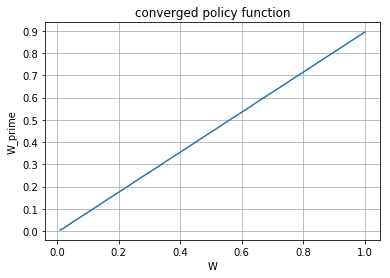

In [9]:
fig,ax = plt.subplots()
ax.plot(W,new_W)
ax.set_xlabel("W")
ax.set_ylabel("W_prime")
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_title("converged policy function")
ax.grid()

### 5.16

In [10]:
sigma = 0.5
varepsilon = np.array([i*sigma for i in range(1,8)])
Gamma_func = lambda x: norm(loc = 0, scale = sigma).pdf(x)
Gamma = Gamma_func(varepsilon)

### 5.17

In [11]:
new_psi_T = np.zeros((100,7))
new_Value_T = np.empty((100,7))
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_value_func = lambda x: -e*np.log(w-x)
        new_psi_T[i,j] = max(float(opt.fmin(new_value_func, 0, disp = 0)),0)
        new_Value_T[i,j] = e*np.log(w-psi_T[i])
print("The policy function W' is", new_psi_T)
print(r"The value function V_T is", new_Value_T)

The policy function W' is [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 

### 5.18

In [12]:
new_Value_T_plus_1 = np.zeros((100,7))
new_delta_T = (new_Value_T-new_Value_T_plus_1).reshape(1,-1)@(new_Value_T-new_Value_T_plus_1).reshape(-1,1)
print("The distance metric is", new_delta_T)

The distance metric is [[6262.41387309]]


### 5.19

In [13]:
new_Value_T_minus_1 = np.zeros((100,7))
new_psi_T_minus_1 = 0.005 * np.ones((100,7))
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_value_func1 = lambda x: -e*np.log(w-x)-0.9*(Gamma.reshape(1,-1)@varepsilon.reshape(-1,1))*np.log(x)
        new_psi_T_minus_1[i,j] = max(opt.fmin(new_value_func1, 0.005, disp = 0),0)
        new_Value_T_minus_1[i,j] = e*np.log(w-new_psi_T_minus_1[i,j])+0.9*(Gamma.reshape(1,-1)@varepsilon.reshape(-1,1))*np.log(new_psi_T_minus_1[i,j])
new_delta_T_minus_1 = (new_Value_T-new_Value_T_minus_1).reshape(1,-1)@(new_Value_T-new_Value_T_minus_1).reshape(-1,1)
print("The policy function is", new_psi_T_minus_1)
print(r"The value function is", new_Value_T_minus_1)
print("The distance metric is", new_delta_T_minus_1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:551: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:567: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


The policy function is [[0.0039375  0.0024375  0.0018125  0.0014375  0.0011875  0.00096875
  0.00084375]
 [0.0079375  0.0049375  0.0035625  0.0028125  0.0023125  0.0019375
  0.0016875 ]
 [0.011875   0.007375   0.005375   0.00425    0.0035     0.0029375
  0.0025625 ]
 [0.0158125  0.009875   0.0071875  0.005625   0.004625   0.0039375
  0.0034375 ]
 [0.0198125  0.0123125  0.0089375  0.0070625  0.0058125  0.0049375
  0.00425   ]
 [0.02375    0.0148125  0.01075    0.0084375  0.0069375  0.005875
  0.005125  ]
 [0.0276875  0.01725    0.0125625  0.009875   0.008125   0.006875
  0.006     ]
 [0.0316875  0.01975    0.0143125  0.01125    0.00925    0.007875
  0.0068125 ]
 [0.035625   0.0221875  0.016125   0.0126875  0.0104375  0.008875
  0.0076875 ]
 [0.0395625  0.0246875  0.0179375  0.0140625  0.0115625  0.0098125
  0.0085625 ]
 [0.0435     0.027125   0.0196875  0.0155     0.01275    0.0108125
  0.0094375 ]
 [0.0475     0.029625   0.0215     0.016875   0.013875   0.0118125
  0.01025   ]
 [0.0514

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:555: RuntimeWarning: invalid value encountered in less
  if fxe < fxr:


### 5.20

In [14]:
new_Value_T_minus_2 = np.zeros((100,7))
new_psi_T_minus_2 = 0.005 * np.ones((100,7))
def value(x, e):
    n = int(e/sigma)
    if x > 0.01:
        return np.interp(x, W, new_Value_T_minus_1[:,n-1])
    else:
        return new_Value_T_minus_1[0,n-1]-np.log(0.01/x)
for j in range(7):
    e = varepsilon[j]
    for i in range(100):
        w = W[i]
        new_value_func2 = lambda x: -e*np.log(w-x)-0.9*sum(Gamma[i]*value(x,varepsilon[i]) for i in range(7))
        new_psi_T_minus_2[i,j] = max(opt.fmin(new_value_func2, 0.005, disp = 0),0)
        new_Value_T_minus_2[i,j] = np.log(w-new_psi_T_minus_2[i,j])+0.9*sum(Gamma[i]*value(new_psi_T_minus_2[i,j],varepsilon[i]) for i in range(7))
new_delta_T_minus_2 = (new_Value_T_minus_1-new_Value_T_minus_2).reshape(1,-1)@(new_Value_T_minus_1-new_Value_T_minus_2).reshape(-1,1)
print("The policy function is", new_psi_T_minus_2)
print(r"The value function is", new_Value_T_minus_2)
print("The distance metric is", new_delta_T_minus_2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:551: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:567: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:


The policy function is [[0.0051875  0.0035     0.002625   0.002125   0.00175    0.0015
  0.00134375]
 [0.01       0.007      0.0053125  0.00425    0.0035625  0.0030625
  0.0026875 ]
 [0.0156875  0.01       0.0079375  0.006375   0.0053125  0.0045625
  0.004     ]
 [0.02       0.011375   0.01       0.0085     0.007125   0.006125
  0.005375  ]
 [0.0255625  0.02       0.01       0.01       0.008875   0.007625
  0.0066875 ]
 [0.03       0.02       0.017125   0.01       0.01       0.0091875
  0.0080625 ]
 [0.0355625  0.021125   0.02       0.0128125  0.01       0.01
  0.009375  ]
 [0.04       0.03       0.02       0.02       0.01       0.01
  0.01      ]
 [0.0455625  0.03       0.02       0.02       0.0185     0.01
  0.01      ]
 [0.05       0.031125   0.0266875  0.02       0.02       0.0141875
  0.01      ]
 [0.055625   0.04       0.03       0.02       0.02       0.02
  0.01      ]
 [0.06       0.04       0.03       0.02225    0.02       0.02
  0.0199375 ]
 [0.0656875  0.0411875  0.03       

### 5.21

In [15]:
def new_optimize(init=W, E = varepsilon, P = Gamma, u = lambda x: np.log(x), beta = 0.9, error = 1e-9, maxiter = 1000):
    W = init
    Gamma = P
    varepsilon = E
    V = np.zeros((W.size, Gamma.size))
    for i in range(Gamma.size):
        V[:,i] = varepsilon[i]*np.log(W)
    Error = 1
    count = 0
    while Error>error and count <= maxiter:
        count += 1
        new_V = np.array(V)
        new_W = 0.01*np.ones((W.size,Gamma.size))
        def value(x, e):
            n = int(e/sigma)
            if x > 0.01:
                return np.interp(x, W, V[:,n-1])
            else:
                return V[0,n-1]-np.log(0.01/x)
        for j in range(7):
            e = varepsilon[j]
            for i in range(100):
                w = W[i]
                value_func = lambda x: -e*np.log(w-x)-0.9*sum(Gamma[i]*value(x,varepsilon[i]) for i in range(7))
                new_W[i,j] = max(opt.fmin(value_func, 0.005, disp = 0),0)
                new_V[i,j] = np.log(w-new_W[i,j])+0.9*sum(Gamma[i]*value(new_W[i,j],varepsilon[i]) for i in range(7))
        Error = (V-new_V).reshape(1,-1)@(V-new_V).reshape(-1,1)
        V = new_V
    return new_V, new_W
V, new_W = new_optimize()
print("The policy function is", new_W)
print(r"The value function is", V)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:551: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[0]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:562: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-2]:
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:567: RuntimeWarning: invalid value encountered in less
  if fxr < fsim[-1]:
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log


The policy function is [[0.0051875  0.0035     0.002625   0.002125   0.00175    0.0015
  0.00134375]
 [0.01       0.007      0.0053125  0.00425    0.0035625  0.0030625
  0.0026875 ]
 [0.017125   0.01       0.0079375  0.006375   0.0053125  0.0045625
  0.004     ]
 [0.02       0.0141875  0.01       0.0085     0.007125   0.006125
  0.005375  ]
 [0.02       0.02       0.0113125  0.01       0.008875   0.007625
  0.0066875 ]
 [0.0371875  0.02       0.02       0.01       0.01       0.0091875
  0.0080625 ]
 [0.044125   0.02       0.02       0.0184375  0.01       0.01
  0.009375  ]
 [0.05       0.02       0.02       0.02       0.0155     0.01
  0.01      ]
 [0.05       0.04       0.02       0.02       0.02       0.012625
  0.01      ]
 [0.05       0.04825    0.02       0.02       0.02       0.02
  0.01      ]
 [0.05       0.05       0.02       0.02       0.02       0.02
  0.01975   ]
 [0.05       0.05       0.0243125  0.02       0.02       0.02
  0.02      ]
 [0.05       0.05       0.05       0

### 5.22

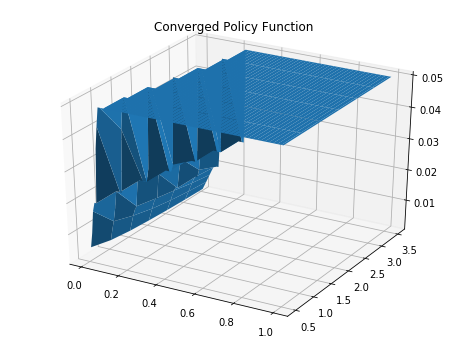

In [16]:
X, Y = np.meshgrid(W, varepsilon)
new_fig = plt.figure(figsize=(8, 6))
new_ax = new_fig.add_subplot(111, projection='3d')
new_ax.plot_surface(X.T, Y.T, new_W)
new_ax.set_title("Converged Policy Function") 
plt.show()